In [1]:

# Conjunto de datos
#=================================================================
import pandas as pd
import numpy as np

# Gráficos
#==================================================================
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==================================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori



from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Importar las bibliotecas necesarias
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### Cargue y limpieza de datos

In [2]:
data_cruda = pd.read_csv('Produccion_Frutales_Valle_del_Cauca.csv', sep=';')
data_cruda.head()

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,15,2016
1,Cali,Banano,0,2016
2,Cali,Bananito,0,2016
3,Cali,Borojó,0,2016
4,Cali,Cítricos,161,2016


In [3]:
data_cruda['Municipios'].unique()

array(['Cali', 'Alcalá', 'Andalucia', 'Ansermanuevo', 'Argelia',
       'Bolivar', 'Buenaventura', 'Buga', 'Bugalagrande', 'Caicedonia',
       'Calima Darién', 'Candelaria', 'Cartago', 'Dagua', 'El Aguila',
       'El Cairo', 'El Cerrito', 'El Dovio', 'Florida', 'Ginebra',
       'Guacarí', 'Jamundí', 'La Cumbre', 'La Unión', 'La Victoria',
       'Obando', 'Palmira', 'Pradera', 'Restrepo', 'Riofrio',
       'Roldanillo', 'San Pedro', 'Sevilla', 'Toro', 'Trujillo', 'Tuluá',
       'Ulloa', 'Versalles', 'Vijes', 'Yotoco', 'Yumbo', 'Zarzal'],
      dtype=object)

In [4]:


print(type(data_cruda))
print(len(data_cruda))
print(data_cruda.columns) #las columnas
print(data_cruda.shape) # se muestra el numero y filas y columnas del daset
print(data_cruda['Municipios'].value_counts())
print(data_cruda.info())
data_cruda.dropna(inplace=True) ## elimina las filas faltantes y sobre escribe las filas originales

<class 'pandas.core.frame.DataFrame'>
924
Index(['Municipios', 'Producto', 'Cantidad', 'Año'], dtype='object')
(924, 4)
Municipios
Cali             22
San Pedro        22
La Unión         22
La Victoria      22
Obando           22
Palmira          22
Pradera          22
Restrepo         22
Riofrio          22
Roldanillo       22
Sevilla          22
Alcalá           22
Toro             22
Trujillo         22
Tuluá            22
Ulloa            22
Versalles        22
Vijes            22
Yotoco           22
Yumbo            22
La Cumbre        22
Jamundí          22
Guacarí          22
Ginebra          22
Andalucia        22
Ansermanuevo     22
Argelia          22
Bolivar          22
Buenaventura     22
Buga             22
Bugalagrande     22
Caicedonia       22
Calima Darién    22
Candelaria       22
Cartago          22
Dagua            22
El Aguila        22
El Cairo         22
El Cerrito       22
El Dovio         22
Florida          22
Zarzal           22
Name: count, dtype: int64
<cl

In [5]:
data_cruda.drop_duplicates(inplace=True)
data_cruda.describe()


,Cantidad,Año
count,924.000000,924.0
mean,605.295455,2016.0
std,3674.605146,0.0
min,0.000000,2016.0
25%,0.000000,2016.0
50%,0.000000,2016.0
75%,111.250000,2016.0
max,67800.000000,2016.0


In [6]:
data_cruda = data_cruda.astype({'Cantidad': 'float', 'Año': 'float'})
print(data_cruda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Municipios  924 non-null    object 
 1   Producto    924 non-null    object 
 2   Cantidad    924 non-null    float64
 3   Año         924 non-null    float64
dtypes: float64(2), object(2)
memory usage: 29.0+ KB
None


In [7]:
data_cruda

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,15.0,2016.0
1,Cali,Banano,0.0,2016.0
2,Cali,Bananito,0.0,2016.0
3,Cali,Borojó,0.0,2016.0
4,Cali,Cítricos,161.0,2016.0
...,...,...,...,...
919,Zarzal,Papaya,174.0,2016.0
920,Zarzal,Piña,0.0,2016.0
921,Zarzal,Pitaya,0.0,2016.0
922,Zarzal,Tomate Arbol,0.0,2016.0


#### TÉCNICA DE REGRESIÓN LINEAL

In [8]:
data_regresion = data_cruda.copy()
data_regresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Municipios  924 non-null    object 
 1   Producto    924 non-null    object 
 2   Cantidad    924 non-null    float64
 3   Año         924 non-null    float64
dtypes: float64(2), object(2)
memory usage: 29.0+ KB


<Axes: xlabel='Año', ylabel='Cantidad'>

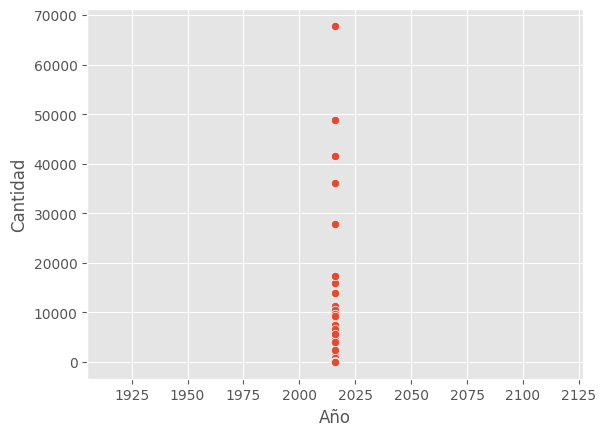

In [9]:

sns.scatterplot(x='Año', y='Cantidad', data=data_regresion)


In [10]:
explicativas = data_regresion[['Año']]
objectivo = data_regresion['Cantidad']

In [11]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [12]:
model.fit(X=explicativas, y=objectivo)

LinearRegression()

In [13]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Año'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 605.2954545454545}

$$
cantidad = 605.5 + 0. * año
$$

In [14]:
y_pred = model.predict(X=explicativas)

In [15]:
data_regresion['prediccion_cantidad'] = y_pred
data_regresion

,Municipios,Producto,Cantidad,Año,prediccion_cantidad
0,Cali,Aguacate,15.0,2016.0,605.295455
1,Cali,Banano,0.0,2016.0,605.295455
2,Cali,Bananito,0.0,2016.0,605.295455
3,Cali,Borojó,0.0,2016.0,605.295455
4,Cali,Cítricos,161.0,2016.0,605.295455
...,...,...,...,...,...
919,Zarzal,Papaya,174.0,2016.0,605.295455
920,Zarzal,Piña,0.0,2016.0,605.295455
921,Zarzal,Pitaya,0.0,2016.0,605.295455
922,Zarzal,Tomate Arbol,0.0,2016.0,605.295455


<Axes: xlabel='Año', ylabel='Cantidad'>

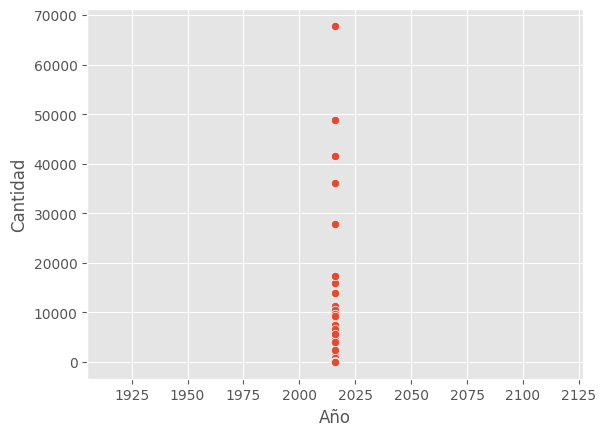

In [16]:
sns.scatterplot(x='Año', y='Cantidad', data=data_regresion)
sns.lineplot(x='Año', y='prediccion_cantidad', data=data_regresion, color='black')

In [17]:
model.score(X=explicativas, y=objectivo)

0.0

El modelo explica un 0 % de la variavilidad original del total de frutas producidas por año.

#### TÉCNICA DE AGRUPACIÓN (CLUSTERING)

In [18]:
data_clustering = data_cruda.copy()
data_clustering.head()

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,15.0,2016.0
1,Cali,Banano,0.0,2016.0
2,Cali,Bananito,0.0,2016.0
3,Cali,Borojó,0.0,2016.0
4,Cali,Cítricos,161.0,2016.0


<Axes: xlabel='Año', ylabel='Cantidad'>

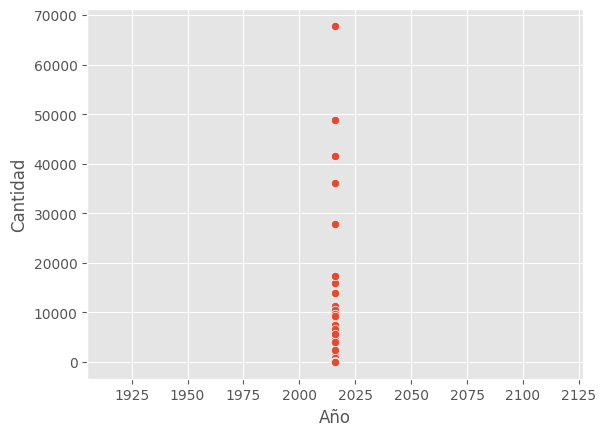

In [19]:

sns.scatterplot(x='Año', y='Cantidad', data=data_clustering)

In [20]:
scaler = MinMaxScaler( feature_range=(0,1000))  # Normalizar los datos
explicativas = scaler.fit_transform(data_clustering[['Año', 'Cantidad']])
explicativas

array([[0.        , 0.22123894],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [21]:
model = KMeans(n_clusters=3, random_state=123)
model.fit(X=explicativas)

KMeans(n_clusters=3, random_state=123)

In [22]:
# Obtener las etiquetas de clúster asignadas a cada muestra
labels = model.labels_

# Agregar las etiquetas de clúster al conjunto de datos original
data_clustering['Cluster'] = labels


# Analizar los resultados
cluster_centers = scaler.inverse_transform(model.cluster_centers_)  # Centroides de los clústeres
cluster_sizes = data_clustering['Cluster'].value_counts()  # Tamaño de cada clúster


# Imprimir los resultados
for i in range(3):
    print(f"Cluster {i+1} - Tamaño: {cluster_sizes[i]}, Centroide: {cluster_centers[i]}")
data_clustering.groupby('Cluster').describe()



Cluster 1 - Tamaño: 904, Centroide: [2016.          209.13606195]
Cluster 2 - Tamaño: 4, Centroide: [ 2016.  48567.5]
Cluster 3 - Tamaño: 16, Centroide: [ 2016.   10997.75]


Cantidad                                                          \
           count          mean           std      min       25%      50%   
Cluster                                                                    
0          904.0    209.136062    615.920619      0.0      0.00      0.0   
1            4.0  48567.500000  13810.435969  36200.0  40208.75  45135.0   
2           16.0  10997.750000   5638.265531   5679.0   7252.50   9503.5   

                              Año                                       \
              75%      max  count    mean  std     min     25%     50%   
Cluster                                                                  
0          100.00   5475.0  904.0  2016.0  0.0  2016.0  2016.0  2016.0   
1        53493.75  67800.0    4.0  2016.0  0.0  2016.0  2016.0  2016.0   
2        11871.00  27900.0   16.0  2016.0  0.0  2016.0  2016.0  2016.0   

                         
            75%     max  
Cluster                  
0        2016.0  2016.0  
1        2016.0  2016.0  
2        2016.0  2016.0

In [23]:
model.predict(X=explicativas)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<Axes: xlabel='Año', ylabel='Cantidad'>

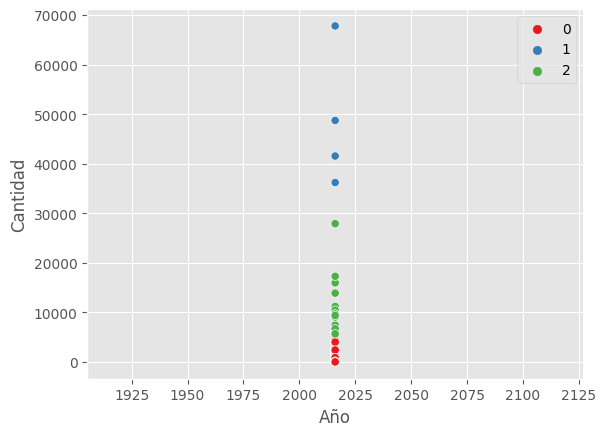

In [24]:
sns.scatterplot(x='Año', y='Cantidad', data=data_clustering, hue=model.predict(X=explicativas), palette='Set1')

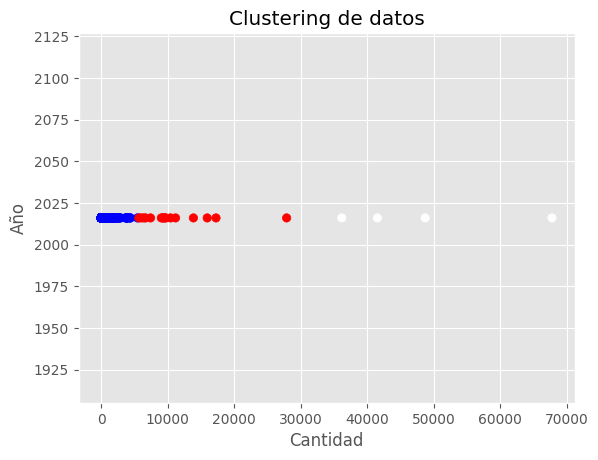

In [25]:



# Visualizar los resultados
plt.scatter(data_clustering['Cantidad'], data_clustering['Año'], c=labels)
plt.xlabel('Cantidad')
plt.ylabel('Año')
plt.title('Clustering de datos')
plt.show()


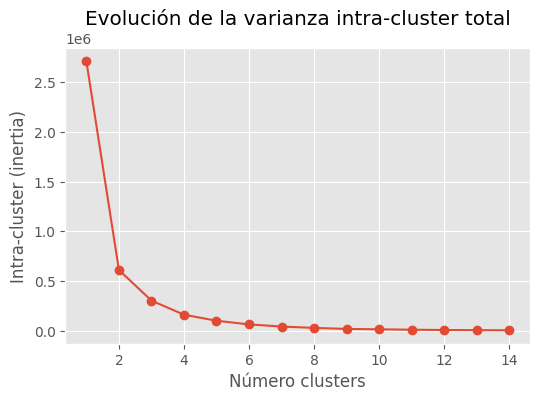

In [26]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(explicativas)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

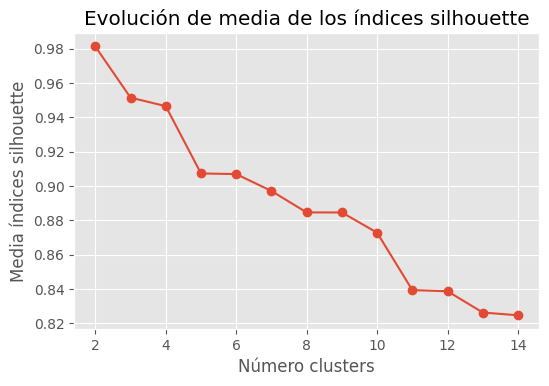

In [27]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(explicativas)
    silhouette_avg = silhouette_score(explicativas, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [28]:
# Preparar los datos
X = data_clustering[['Cantidad', 'Año']]  # Seleccionar las características relevantes para el clustering
scaler = MinMaxScaler()  # Normalizar los datos
X_scaled = scaler.fit_transform(X)

# Definir el número de clústeres
num_clusters = 3 #3

# Aplicar el algoritmo de K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)



KMeans(n_clusters=3, random_state=42)

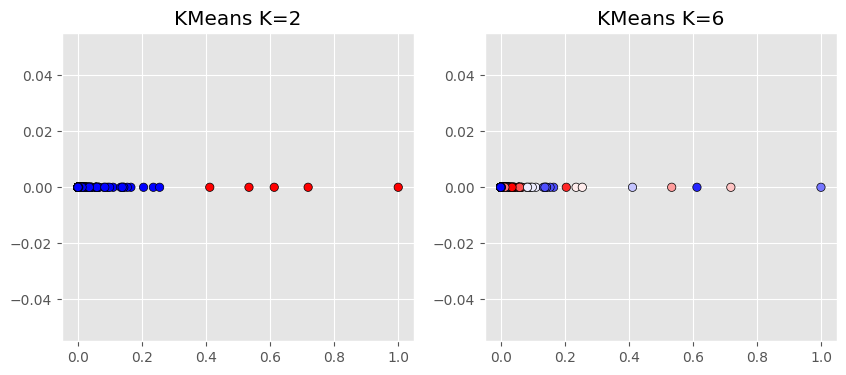

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=14, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

#### TÉCNICA DE REGLAS DE ASOCIACIÓN 

In [30]:
data_asociacion = data_cruda.copy()
data_asociacion

,Municipios,Producto,Cantidad,Año
0,Cali,Aguacate,15.0,2016.0
1,Cali,Banano,0.0,2016.0
2,Cali,Bananito,0.0,2016.0
3,Cali,Borojó,0.0,2016.0
4,Cali,Cítricos,161.0,2016.0
...,...,...,...,...
919,Zarzal,Papaya,174.0,2016.0
920,Zarzal,Piña,0.0,2016.0
921,Zarzal,Pitaya,0.0,2016.0
922,Zarzal,Tomate Arbol,0.0,2016.0


In [31]:
dataset_productos = [data_asociacion['Producto'].to_list()]
dataset_productos

[['Aguacate',
  'Banano',
  'Bananito',
  'Borojó',
  'Cítricos',
  'Curuba',
  'Chontaduro',
  'Coco',
  'Granadilla',
  'Guanabana',
  'Guayaba',
  'Lulo',
  'Mango',
  'Maracuyá',
  'Melón A',
  'Melón B',
  'Mora',
  'Papaya',
  'Piña',
  'Pitaya',
  'Tomate Arbol',
  'Vid',
  'Aguacate',
  'Banano',
  'Bananito',
  'Borojó',
  'Cítricos',
  'Curuba',
  'Chontaduro',
  'Coco',
  'Granadilla',
  'Guanabana',
  'Guayaba',
  'Lulo',
  'Mango',
  'Maracuyá',
  'Melón A',
  'Melón B',
  'Mora',
  'Papaya',
  'Piña',
  'Pitaya',
  'Tomate Arbol',
  'Vid',
  'Aguacate',
  'Banano',
  'Bananito',
  'Borojó',
  'Cítricos',
  'Curuba',
  'Chontaduro',
  'Coco',
  'Granadilla',
  'Guanabana',
  'Guayaba',
  'Lulo',
  'Mango',
  'Maracuyá',
  'Melón A',
  'Melón B',
  'Mora',
  'Papaya',
  'Piña',
  'Pitaya',
  'Tomate Arbol',
  'Vid',
  'Aguacate',
  'Banano',
  'Bananito',
  'Borojó',
  'Cítricos',
  'Curuba',
  'Chontaduro',
  'Coco',
  'Granadilla',
  'Guanabana',
  'Guayaba',
  'Lulo',
  

In [32]:

te = TransactionEncoder()
te_ary = te.fit(dataset_productos).transform(dataset_productos)
df_dataset_productos = pd.DataFrame(te_ary, columns=te.columns_)
df_dataset_productos

,Aguacate,Bananito,Banano,Borojó,Chontaduro,Coco,Curuba,Cítricos,Granadilla,Guanabana,...,Mango,Maracuyá,Melón A,Melón B,Mora,Papaya,Pitaya,Piña,Tomate Arbol,Vid
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [33]:
 #apriori(df_dataset_productos, min_support=0.6)

In [34]:
# apriori(df_dataset_productos, min_support=0.6, use_colnames=True)

In [49]:
frequent_itemsets = apriori(df_dataset_productos, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.0,(Aguacate),1
1,1.0,(Bananito),1
2,1.0,(Banano),1
3,1.0,(Borojó),1
4,1.0,(Chontaduro),1
...,...,...,...
4194298,1.0,"(Guanabana, Melón A, Piña, Maracuyá, Mora, Tom...",21
4194299,1.0,"(Guanabana, Melón A, Piña, Maracuyá, Mora, Tom...",21
4194300,1.0,"(Guanabana, Melón A, Piña, Maracuyá, Mora, Tom...",21
4194301,1.0,"(Guanabana, Melón A, Piña, Maracuyá, Mora, Tom...",21


In [47]:
par_frequent_itemsets = frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                    (frequent_itemsets['support'] >= 0.6) ].sort_values(by='support', ascending=False)
par_frequent_itemsets

,support,itemsets,length
22,1.0,"(Bananito, Aguacate)",2
167,1.0,"(Melón A, Granadilla)",2
169,1.0,"(Mora, Granadilla)",2
170,1.0,"(Papaya, Granadilla)",2
171,1.0,"(Pitaya, Granadilla)",2
...,...,...,...
103,1.0,"(Granadilla, Chontaduro)",2
104,1.0,"(Guanabana, Chontaduro)",2
105,1.0,"(Guayaba, Chontaduro)",2
106,1.0,"(Lulo, Chontaduro)",2


In [51]:
# Association Rules & Info
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)
df_ar